# Simulating MIMIC Patient
We used Pulse to simulate patients in MIMIC, initializing them using their readings in MIMIC, and administering IV fluids and vasopressors at each time step as done in MIMIC. (See [MIMICSimulator.py](https://gitlab.kitware.com/faaizT/engine/-/blob/local-changes/src/python/pulse/rlengine/SimulationEngine.py) for more details about the simulations.)  
This note compares a patient in MIMIC with their simulated counterpart. The simulated patients have had their blood chemistry modified.

In [1]:
import pandas as pd
icustayid = 4201.0
export_dir = "/data/localhost/taufiq/export-dir/"
mimic_csv = "/data/localhost/taufiq/Pulse/engine/src/python/pulse/rlengine/resources/MIMICtable-1hourly_entire-stay.csv"

In [2]:
simulation = pd.read_csv(export_dir + "simulation_" + str(icustayid) + "_final_1613490373.csv")
simulation = simulation.replace(r"[\[|\]]", "", regex=True)

In [3]:
simulation.head()

,ArterialPressure (mmHg),BloodVolume (mL),Carina - CarbonDioxide - PartialPressure (mmHg),CoreTemperature (degC),DiastolicArterialPressure (mmHg),EndTidalCarbonDioxidePressure (mmHg),HeartRate (1/min),Lead3ElectricPotential (mV),MeanArterialPressure (mmHg),OxygenSaturation (None),RespirationRate (1/min),SimulationTime(s),SystolicArterialPressure (mmHg),time
0,71.28676243083197,3548.50718478226,0.34554619438818684,36.99430595628451,67.96219981414428,34.634862262460324,88.23529411764703,0.06300000000000017,95.8533437288661,0.977097845497361,15.463917525773207,0.0,121.08104515439965,4.753951e+09
1,111.42023439475052,4002.2719524403947,34.72912096070154,37.11873762959965,61.42133388131979,34.76192477295357,73.17073170731703,0.6680000000000001,97.35750219238628,0.9773727793923432,15.873015873015891,14400.000000221478,129.92478039456773,4.753966e+09
2,63.82226384534275,4100.52007181565,9.177403925755405,37.11767366771784,59.33913064754174,34.78887139532598,69.76744186046508,-0.03500000000000003,96.78533887308103,0.9774639884317493,15.873015873015891,18000.000000300057,130.8479195147653,4.753969e+09
3,69.76479660466507,4287.614627617756,0.4042258591822002,37.115874236212846,57.16766058734958,34.78355937048723,65.2173913043478,0.09550000000000014,98.05225343719785,0.9775581938463082,15.873015873015891,25200.000000457218,135.81748766742382,4.753976e+09
4,92.16755031905622,4376.885719316451,35.34274032232024,37.1150292932935,53.268600151906355,34.81800568610928,61.224489795918345,0.0,96.14199371603041,0.9775517261572504,15.873015873015891,28800.000000535798,135.43054048649412,4.753980e+09


In [4]:
len(simulation)

27

In [5]:
MIMICtable = pd.read_csv(mimic_csv)
MIMICtable.head()


,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
0,1.0,1006.0,4.330306e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,8166.0,4083.0,-8166.0,1.0
1,11.0,1006.0,4.330342e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,12249.0,4083.0,-12249.0,1.0
2,21.0,1006.0,4.330378e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.831461,240.000000,0.0,0.0,0.0,0.0,16332.0,4083.0,-16332.0,1.0
3,22.0,1006.0,4.330382e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.955357,96.000000,0.0,0.0,0.0,0.0,20415.0,4083.0,-20415.0,1.0
4,23.0,1006.0,4.330385e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.812749,109.714286,0.0,0.0,175.0,175.0,24298.0,3883.0,-24123.0,1.0


In [6]:
MIMICtable_filtered = MIMICtable[MIMICtable['icustay_id']==icustayid]
len(MIMICtable_filtered)

27

In [7]:
MIMICtable_filtered.head()

,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
173,1.0,4201.0,4.753951e+09,1.0,25756.991238,4.0,0.0,0.0,0.0,0.0,...,0.579677,1385.714286,0.0,0.0,0.0,0.0,9920.0,4960.0,-9920.0,1.0
174,5.0,4201.0,4.753966e+09,1.0,25756.991238,4.0,0.0,0.0,0.0,0.0,...,0.775281,604.761905,0.0,0.0,0.0,0.0,14880.0,4960.0,-14880.0,1.0
175,6.0,4201.0,4.753969e+09,1.0,25756.991238,4.0,0.0,0.0,0.0,0.0,...,0.775281,604.761905,0.0,0.0,0.0,0.0,19840.0,4960.0,-19840.0,1.0
176,8.0,4201.0,4.753976e+09,1.0,25756.991238,4.0,0.0,0.0,0.0,0.0,...,0.775281,604.761905,0.0,0.0,0.0,0.0,24800.0,4960.0,-24800.0,1.0
177,9.0,4201.0,4.753980e+09,1.0,25756.991238,4.0,0.0,0.0,0.0,0.0,...,0.792135,604.761905,0.0,0.0,2000.0,2000.0,29760.0,4960.0,-27760.0,1.0


In [8]:
time = MIMICtable_filtered['charttime']
diaBP_pulse = simulation['DiastolicArterialPressure (mmHg)']
diaBP_mimic = MIMICtable_filtered['DiaBP']

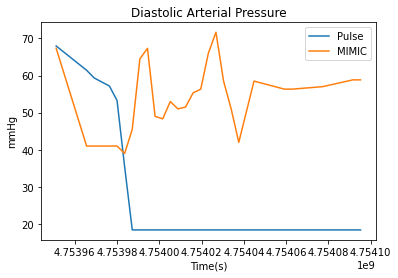

In [9]:
import matplotlib.pyplot as plt
plt.plot(time, pd.to_numeric(diaBP_pulse))
plt.plot(time, diaBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Diastolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

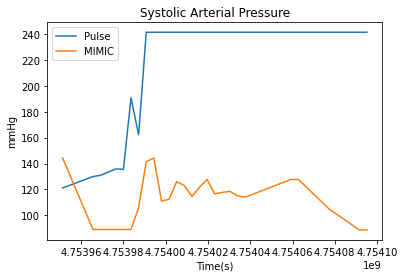

In [10]:
sysBP_pulse = simulation['SystolicArterialPressure (mmHg)']
sysBP_mimic = MIMICtable_filtered['SysBP']
plt.plot(time, pd.to_numeric(sysBP_pulse))
plt.plot(time, sysBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Systolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

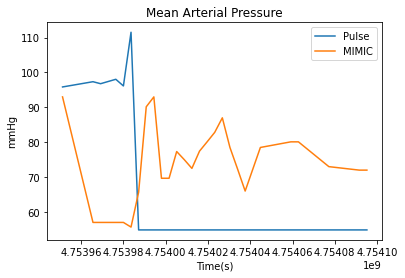

In [11]:
meanBP_pulse = simulation['MeanArterialPressure (mmHg)']
meanBP_mimic = MIMICtable_filtered['MeanBP']
plt.plot(time, pd.to_numeric(meanBP_pulse))
plt.plot(time, meanBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Mean Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

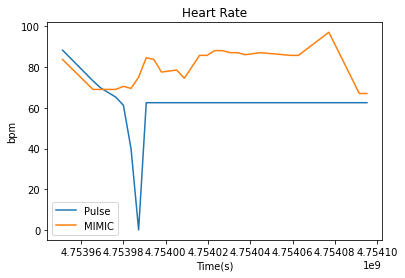

In [12]:
HR_pulse = simulation['HeartRate (1/min)']
HR_mimic = MIMICtable_filtered['HR']
plt.plot(time, pd.to_numeric(HR_pulse))
plt.plot(time, HR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('bpm')
plt.title('Heart Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

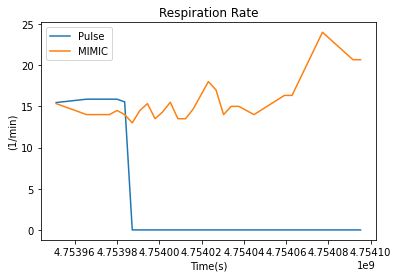

In [13]:
RR_pulse = simulation['RespirationRate (1/min)']
RR_mimic = MIMICtable_filtered['RR']
plt.plot(time, pd.to_numeric(RR_pulse))
plt.plot(time, RR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Respiration Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

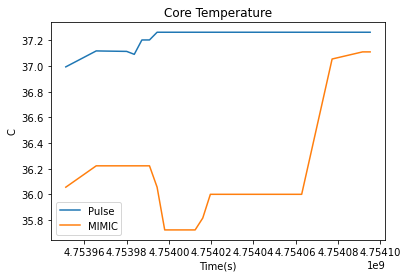

In [14]:
temp_pulse = simulation['CoreTemperature (degC)']
temp_mimic = MIMICtable_filtered['Temp_C']
plt.plot(time, pd.to_numeric(temp_pulse))
plt.plot(time, temp_mimic)
plt.xlabel('Time(s)')
plt.ylabel('C')
plt.title('Core Temperature')
plt.legend(['Pulse', 'MIMIC'])
plt.show()